# 03.2 Clustering - K-Means-Conjunto Iris

In [101]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

## Clasificación de los datos Iris con K-means

__Inicialmente se van a utilizar los 4 atributos del sépalo y pétalo (alto y largo) para clasificar en 3 grupos y mostrar el resultado__


In [102]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [103]:
X = df.values[:,0:4]
y = df.values[:,4]

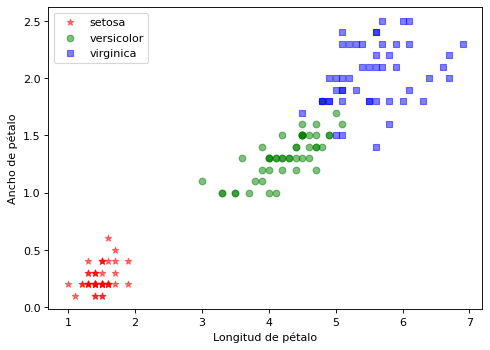

In [104]:
import matplotlib.pyplot as plt
clases = iris['target_names']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y==i,2], X[y==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

In [105]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km = km.fit_predict(X)

__Podemos mostrar las coordenadas de los centroides__

Directamente mostrando la variable <b>cluster_centers_</b> que aparece en el objeto que hemos creado con KMeans o algo más vistoso con un __DataFrame__:

In [118]:
pd.DataFrame(columns=df.columns[0:4],index = np.arange(3),data = km.cluster_centers_)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.850000          3.073684           5.742105          2.071053
1           5.006000          3.428000           1.462000          0.246000
2           5.901613          2.748387           4.393548          1.433871

## Comprobación gráfica de la calidad del clustering

Usando matplotlib.pyplot.scatter

Usar un color para las clases predichas por K-means 
Y una marca para las clases reales de Iris
Usar sólo las características del Petalo.

Observamos que K-medias ha asignado 0,1,2 en distintas posiciones. Observamos los graficos y ajustamos la variable __clases__ manualmente para que el gráfico salga bien.

In [106]:
import matplotlib.pyplot as plt
clases = iris['target_names']
####clases = ['virginica','setosa','versicolor']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
### ... Seguir con el código

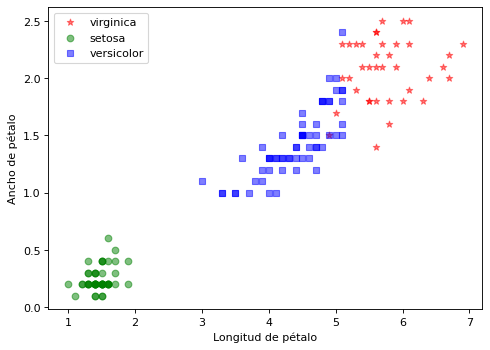

In [107]:
import matplotlib.pyplot as plt
clases = iris['target_names']
clases = ['virginica','setosa','versicolor']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y_km==i,2], X[y_km==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

En el dibujo anterior __se observan puntos que el Cluster no ha separado bien y que pertenecen a las clases versicolor y virginica__

## Ratios de Validación Externa

Calcular los índices __R__ , __ARI__ , __VI__ y __AVI__ considerando el cluster más perfecto el de 4 características.


In [108]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
R=rand_score(labels_true=y, labels_pred=y_km)
ARI=adjusted_rand_score(labels_true=y, labels_pred=y_km)
VI = mutual_info_score(labels_true=y, labels_pred=y_km)
AVI = adjusted_mutual_info_score(labels_true=y, labels_pred=y_km)
R, ARI, VI, AVI

(0.8797315436241611,
 0.7302382722834697,
 0.8255910976103356,
 0.7551191675800483)

## Comprobación del número de grupos, diagrama del codo y optimizar el bic()

In [27]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
p = figure(width=500, plot_height=300)
p.line(range(1,11), distortions, line_color="navy", line_width=3, line_alpha=0.6, legend_label="SSE vs k")
p.legend.location='top_left'
p.legend.click_policy="hide"
p.xaxis.axis_label = 'Número de Clusters'
p.yaxis.axis_label = 'Distorsión'

show(p)

C:\Users\valer_z\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
from sklearn.mixture import GaussianMixture
bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i, init_params='kmeans')
    gmm.fit(X)
    bic.append(gmm.bic(X))
p = figure(width=500, plot_height=300)
p.line(range(1,11), bic, line_color="navy", line_width=3, line_alpha=0.6, legend_label="BIC vs k")
p.legend.location='top_left'
p.legend.click_policy="hide"
p.xaxis.axis_label = 'Número de Clusters'
p.yaxis.axis_label = 'BIC'

show(p)

C:\Users\valer_z\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Uso de la matriz de confusión y de la exactitud para realizar la validación

Para aplicar la matriz confusión y la Exactitud (Accuracy) es preciso asignar las etiquetas en el Clustering, de forma que las etiquetas predichas se correspondan con las del conjunto Iris

- En el conjunto Iris las etiquetas son ['setosa', 'versicolor', 'virginica']
- En el clustering han salido en el orden ['virginica','setosa','versicolor']

Hay que hacer las conversiones en la predicción
- 0 por 2
- 1 por 0
- 2 por 1

In [110]:
y_km_new = []
for k in y_km:
    if k == 0:
        y_km_new.append(2)
    elif k == 1:
        y_km_new.append(0)
    else:
        y_km_new.append(1)
y_km_new = np.array(y_km_new)

__Repetimos el gráfico anterior usando ya las clases estándar iris['target_names'] contra la lista de etiquetas reconvertida__

Vemos que sale bien

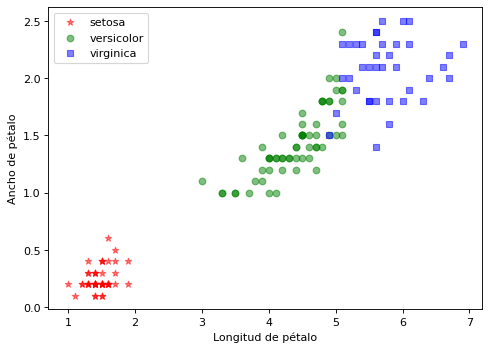

In [111]:
import matplotlib.pyplot as plt
clases = iris['target_names']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y_km_new==i,2], X[y_km_new==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

__Ya podemos sacar los ratios y la matriz de confusión__

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_km_new)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

__Y la exactitud o Accuracy__

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y, y_pred=y_km_new)

0.8933333333333333